In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#lendo a base de dados
cadastro = pd.read_csv('cadastro.csv')

In [ ]:
#visualizando o conteúdo da base
cadastro.head()

In [ ]:
#formato das variáveis
cadastro.info()

In [ ]:
# contagem de observações com dados
cadastro.count()

In [ ]:
# contagem de observações diferentes
cadastro.nunique()

In [ ]:
# é missing ou não ( NA Not Avaliable)
cadastro.isna()

In [ ]:
# Contagem de observações com missing
cadastro.isna().sum()

In [ ]:
# % de observações com missing
cadastro.isna().sum()/len(cadastro)*100

In [ ]:
# Descritivo das variáveis - medidas resumo

cadastro.describe().round(2) 


In [ ]:
# colocando as medidas resumo em um objeto
Describe=cadastro.describe().round(2)
print(Describe)

In [ ]:
#Preprocessing
# mudar o formato da variável number para string
cadastro['NUM_CPF'] = cadastro['NUM_CPF'].astype(str)
cadastro['CHAVE_CONTRATO'] = cadastro['CHAVE_CONTRATO'].astype(str)
cadastro['CEP'] = cadastro['CEP'].astype(str)
cadastro['CEP_A'] = cadastro['CEP_A'].astype(str)
cadastro['NUMERO'] = cadastro['NUMERO'].astype(str)
cadastro['LATITUDE'] = cadastro['LATITUDE'].astype(str)
cadastro['LONGITUDE'] = cadastro['LONGITUDE'].astype(str)
cadastro['CELULAR'] = cadastro['CELULAR'].astype(str)
cadastro['DDD_CELULAR'] = cadastro['DDD_CELULAR'].astype(str)
cadastro['CELULAR_2'] = cadastro['CELULAR_2'].astype(str)
cadastro['DDD_CELULAR_2'] = cadastro['DDD_CELULAR_2'].astype(str)
cadastro['COD_BANCO'] = cadastro['COD_BANCO'].astype(str)               
cadastro['NUM_AGENCIA'] = cadastro['NUM_AGENCIA'].astype(str)          
cadastro['NUM_CONTA'] = cadastro['NUM_CONTA'].astype(str)        
cadastro['CNPJ_CREDOR'] = cadastro['CNPJ_CREDOR'].astype(str)        
cadastro['STATUS_CONSENTIMENTO'] = cadastro['STATUS_CONSENTIMENTO'].astype(str)


In [ ]:
# avaliando as alterações feitas nos formatos das variáveis
cadastro.info()

In [ ]:
# descritivo das variáveis após as alterações realizadas
cadastro.describe().round(2)

In [ ]:
cadastro.isna().sum()

In [ ]:
cadastro.head(2).T

In [ ]:
# indicando e alterando campos
cadastro.replace('nan', np.NaN, inplace=True)

In [ ]:
cadastro.head(2).T

In [ ]:
cadastro.isna().sum()

In [ ]:
cadastro.isna().sum()/len(cadastro)*100

In [ ]:
!pip install missingno
import missingno as msno

# Visualizando os dados faltantes? A biblioteca MissingNo permite a visualização dos dados nulos (‘NaN’) em seu dataset

In [ ]:
# Análise da completude das variáveis do banco de dados usando o gráfico de barra. No eixo "Y" é a frequência relativa e no 
# eixo "X" as variáveis.
msno.bar(cadastro)

In [ ]:
# Mapa de Calor 
# O heatmap da biblioteca MissingNo vai medir a correlação de nulidade dos atributos, 
# ou seja, o quão forte a presença ou ausência de um atributo afeta a presença de outro.
# A correlação vai recebe valores entre -1 e 1 ou até mesmo não recebem nenhum valor.
# Atributos que tem Correlação de Nulidade que:
# São iguais ou tendem a -1: Significa que se um atributo aparece o outro não aparece.
# São iguais ou tendem a 0: Implica que um determinado atributo aparecer ou não, não tem efeito no outro atributo em questão.
# São iguais ou tendem a 1: Indica que se um atributo aparece o outro também aparece.
# Não recebem valor: Os atributos ou possuem todos dados preenchidos ou todos vazios, isto faz com que eles não tenham uma correlação relevante.

msno.heatmap(cadastro)

In [ ]:
# Análise da completude das variáveis em uma amostra de tamanho 100 (n=100) do banco de dados usando o gráfico de barra. 
# No eixo "Y" é a frequência relativa e no eixo "X" as variáveis.

msno.bar(cadastro.sample(100))

In [ ]:
# Imputação de dados faltantes usando a média
cadastro['Idade_i'] = cadastro['IDADE'].fillna(value=cadastro['IDADE'].mean())

In [ ]:
cadastro.info()

In [ ]:
cadastro.columns

In [ ]:
cadastro.describe().round(2)

In [ ]:
# CV = desvio padrão/média

desc = cadastro.describe().T

desc['CV'] = desc['std']/desc['mean']

In [ ]:
desc.round(2)

In [ ]:
# Interpretação do CV
Renda presumida: O desvio padrão é 10.76 vezes o valor da média. Isso indica presença de outliers. Quantos outliers?

    Recomendado é até 0,3 ou 30%. Valores acima de 30% indicam presença de outliers. (Critério do IBGE)
    


In [ ]:
# Histograma da variável Renda presumida
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

In [ ]:
sns.boxplot(y="RENDA_PRESUMIDA", data=cadastro)

In [ ]:
renda = cadastro[(cadastro['RENDA_PRESUMIDA'] <10000)]

In [ ]:
sns.boxplot(y="RENDA_PRESUMIDA", data=renda)

## Análise de detecção de outliers usano o Box Plot

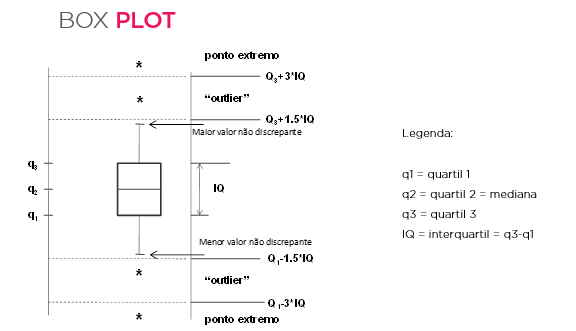

In [ ]:
# Box Plot da Renda Presumida
mínimo = 0
máximo = 1890000
Quartil 1 (Q1) = 2068.50
Quartil 2 (Q2) = 2431.58
Quartil 3 (Q3) = 2923.54
Inter-quartil = Q3 - Q1 = 2923.54 - 2068.50 = 855.04

Limite1  = Q3 + 3 * IQ = 2923.54 + 3*855.04 = 5488.66
Limite2  = Q3 + 1.5*IQ = 2923.54 + 1.5*855.04 = 4206.10
Limite3  = Q1 - 1.5*IQ = 2068.50 - 1.5*855.04 = 785.94
Limite4  = Q1 - 3*IQ = 2068.50 - 3*855.04 = -496.62 ~= 0

In [ ]:
cadastro.describe().round(2)

In [ ]:
print('Minimo = ', min(cadastro['RENDA_PRESUMIDA']))

In [ ]:
print('Maximo = ', max(cadastro['RENDA_PRESUMIDA']))

In [ ]:
Q1 = np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(Q1)
print('Quartil1 (Q1) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

In [ ]:
Q2=np.percentile(cadastro['RENDA_PRESUMIDA'], 50)
print(Q2)
print('Quartil2 (Q2) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 50))

In [ ]:
Q3=np.percentile(cadastro['RENDA_PRESUMIDA'], 75)
print(Q3)
print('Quartil3 (Q3) = ', np.percentile(cadastro['RENDA_PRESUMIDA'], 75))

In [ ]:
IQ = np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)
print(IQ)
print('Inter-quartil (IQ) =', np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

In [ ]:
limite1 = Q3+3*IQ
print(limite1)

In [ ]:
limite2 = Q3+1.5*IQ
print(limite2)

In [ ]:
limite3=Q1-1.5*IQ
print(limite3)

In [ ]:
limite4 = Q1-3*IQ
print(limite4)

In [ ]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite2) & (cadastro.RENDA_PRESUMIDA <= limite1), 'outlier_renda']=1
cadastro.loc[(cadastro.RENDA_PRESUMIDA > limite1) | (cadastro.RENDA_PRESUMIDA < limite4) , 'outlier_renda']=2
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite3) & (cadastro.RENDA_PRESUMIDA < limite2), 'outlier_renda']=0

In [ ]:
cadastro.info()

In [ ]:
# Quantos outliers? Pontos extremos?
print('Outliers Inferior: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite2) & (cadastro.RENDA_PRESUMIDA <= limite1), 'RENDA_PRESUMIDA'].count())
print('Outliers Superior: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite4) & (cadastro.RENDA_PRESUMIDA <= limite3), 'RENDA_PRESUMIDA'].count())
print('Pontos Extremos: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= limite1) | (cadastro.RENDA_PRESUMIDA <= limite4), 'RENDA_PRESUMIDA'].count())


In [ ]:
# Tabela de frequência da variável outlier_renda

freq_outlier_renda = pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)
freq_outlier_renda['%'] = ((pd.pivot_table(cadastro,index='outlier_renda', values='NUM_CPF', aggfunc=np.count_nonzero)/cadastro['NUM_CPF'].count())*100).round(2)

In [ ]:
print(freq_outlier_renda)

In [ ]:
################################################
########### REMOVER OS OUTLIERS ############
################################################

# Removendo os Outliers
cadastroSemOutlier = cadastro.loc[cadastro.outlier_renda == 0.0]

print('Mínimo = ', min(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Máximo = ', max(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Média = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).mean())

print('STD = ', cadastroSemOutlier['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (cadastroSemOutlier['RENDA_PRESUMIDA'].std() / cadastroSemOutlier['RENDA_PRESUMIDA'].mean()))

print('Mediana = ', (cadastroSemOutlier['RENDA_PRESUMIDA']).median())
